In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
import pandas as pd
import os.path as osp
import json
from scipy.io import loadmat
import mne
import seaborn as sns

In [49]:
# mat = scipy.io.loadmat("../data/derivatives/RDM/stats_RDM_full.mat")
ENV_PATH = "../"
DATA_PATH = "../data"


## Loading Data

Loading participant data

In [50]:
participants_data = pd.read_csv(osp.join(DATA_PATH, "participants.tsv"), sep="\t")
participants_data.head()
print(participants_data.shape)

(50, 8)


Understanding what each header means

In [51]:
with open(osp.join(DATA_PATH, "participants.json"), "rb") as f:
    participants_data_meta = json.load(f)
participants_data_meta

{'participant_id': {'Description': 'participant number'},
 'age': {'Description': 'participant age in years at time of acquisition'},
 'gender': {'Description': 'participant self-reported gender (M:Male, F:Female)'},
 'native_english': {'Description': 'Whether the participant was a native English speaker'},
 'language_profile': {'Description': 'Number of languages spoken'},
 'language_spoken_at_home': {'Description': 'Language spoken at home'},
 'exclude': {'Description': '1 for suggested exclusion of participant due to very poor signal or missing data'},
 'note_IZ': {'Description': 'Experimenter notes'}}

Loading a single participants EEG data using the mne package

In [52]:
bv = mne.io.read_raw_brainvision("../data/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr")
bv

Extracting parameters from ../data/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...


<RawBrainVision | sub-01_task-rsvp_eeg.eeg, 63 x 3035740 (3035.7 s), ~93 kB, data not loaded>

In [53]:
# extract some useful values
times = bv.times # time values of each sample
N = bv.n_times # sample count
channel_types = bv.get_channel_types()

In [54]:
data = bv.get_data()
data.shape

(63, 3035740)

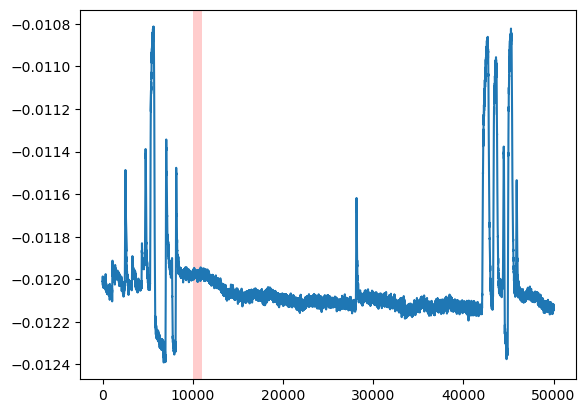

In [55]:
ax = plt.plot(data[0][:50000])
# Zoom in
plt.axvspan(10000, 11000, facecolor='red', alpha=.2)

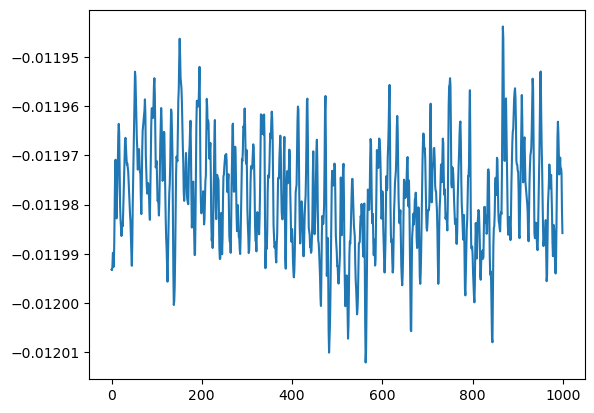

In [56]:
plt.plot(data[0][10000:11000])

In [57]:
welch_psd = bv.compute_psd()
welch_psd.shape

Effective window size : 0.256 (s)


(63, 129)

EDA for subject 1
--

In [58]:
df1 = pd.read_csv(osp.join(DATA_PATH, "sub-01/eeg/sub-01_task-rsvp_events.csv"))
df1.head()

,eventnumber,objectnumber,object,sequencenumber,presentationnumber,blocksequencenumber,withinsequencenumber,stimnumber,stim,istarget,stimname,response,rt,correct,time_stimon,time_stimoff,stimdur
0,0,275,carousel,0,0,0,0,10,stimuli\carousel\carousel_11s.jpg,0,carousel_11s.jpg,0.0,0.0,0.0,61.552560,61.602540,0.049980
1,1,1165,piano,0,1,0,0,4,stimuli\piano\piano_05n.jpg,0,piano_05n.jpg,0.0,0.0,0.0,61.652560,61.702538,0.049977
2,2,1735,turntable,0,2,0,0,11,stimuli\turntable\turntable_12s.jpg,0,turntable_12s.jpg,0.0,0.0,0.0,61.752561,61.802545,0.049984
3,3,1643,tent,0,3,0,0,7,stimuli\tent\tent_08n.jpg,0,tent_08n.jpg,0.0,0.0,0.0,61.852564,61.902516,0.049951
4,4,1564,stove2,0,4,0,0,8,stimuli\stove2\stove2_09s.jpg,0,stove2_09s.jpg,0.0,0.0,0.0,61.952542,62.002516,0.049974


In [59]:
df1[['time_stimoff', 'time_stimon', 'stimdur']].describe()

,time_stimoff,time_stimon,stimdur
count,22248.000000,22248.000000,22248.000000
mean,1553.889417,1553.839433,0.049984
std,897.850962,897.850966,0.000276
min,61.602540,61.552560,0.047609
25%,756.204358,756.154372,0.049976
50%,1520.591367,1520.541387,0.049980
75%,2357.138630,2357.088649,0.049985
max,3074.016016,3073.966039,0.083347


In [85]:
# Preprocess the object names, remove numbers at the end of the string

df1.object = df1.object.map(lambda x: x.rstrip("0123456789").replace("_", " "))
df1.head()

,eventnumber,objectnumber,object,sequencenumber,presentationnumber,blocksequencenumber,withinsequencenumber,stimnumber,stim,istarget,stimname,response,rt,correct,time_stimon,time_stimoff,stimdur
0,0,275,carousel,0,0,0,0,10,stimuli\carousel\carousel_11s.jpg,0,carousel_11s.jpg,0.0,0.0,0.0,61.552560,61.602540,0.049980
1,1,1165,piano,0,1,0,0,4,stimuli\piano\piano_05n.jpg,0,piano_05n.jpg,0.0,0.0,0.0,61.652560,61.702538,0.049977
2,2,1735,turntable,0,2,0,0,11,stimuli\turntable\turntable_12s.jpg,0,turntable_12s.jpg,0.0,0.0,0.0,61.752561,61.802545,0.049984
3,3,1643,tent,0,3,0,0,7,stimuli\tent\tent_08n.jpg,0,tent_08n.jpg,0.0,0.0,0.0,61.852564,61.902516,0.049951
4,4,1564,stove,0,4,0,0,8,stimuli\stove2\stove2_09s.jpg,0,stove2_09s.jpg,0.0,0.0,0.0,61.952542,62.002516,0.049974


In [86]:
things_df = pd.read_csv(osp.join(ENV_PATH, "things_clustering.csv") , sep=", ")
things_df.head()

C:\Users\whati\AppData\Local\Temp\ipykernel_20276\2845761890.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  things_df = pd.read_csv(osp.join(ENV_PATH, "things_clustering.csv") , sep=", ")


,object,category
0,aardvark,Natural
1,abacus,Artificial
2,accordion,Artificial
3,acorn,Natural
4,air conditioner,Artificial


In [87]:

# from things_df add the category onto each row of df1 based on the row's object value
df1_cat = df1.merge(things_df, on="object", how="left")
df1_cat.head()

,eventnumber,objectnumber,object,sequencenumber,presentationnumber,blocksequencenumber,withinsequencenumber,stimnumber,stim,istarget,stimname,response,rt,correct,time_stimon,time_stimoff,stimdur,category
0,0,275,carousel,0,0,0,0,10,stimuli\carousel\carousel_11s.jpg,0,carousel_11s.jpg,0.0,0.0,0.0,61.552560,61.602540,0.049980,Artificial
1,1,1165,piano,0,1,0,0,4,stimuli\piano\piano_05n.jpg,0,piano_05n.jpg,0.0,0.0,0.0,61.652560,61.702538,0.049977,Artificial
2,2,1735,turntable,0,2,0,0,11,stimuli\turntable\turntable_12s.jpg,0,turntable_12s.jpg,0.0,0.0,0.0,61.752561,61.802545,0.049984,Artificial
3,3,1643,tent,0,3,0,0,7,stimuli\tent\tent_08n.jpg,0,tent_08n.jpg,0.0,0.0,0.0,61.852564,61.902516,0.049951,Natural
4,4,1564,stove,0,4,0,0,8,stimuli\stove2\stove2_09s.jpg,0,stove2_09s.jpg,0.0,0.0,0.0,61.952542,62.002516,0.049974,Artificial


In [91]:
print(df1_cat[["object", "category"]][:30])

             object    category
0          carousel  Artificial
1             piano  Artificial
2         turntable  Artificial
3              tent     Natural
4             stove  Artificial
5             stove  Artificial
6          birdbath  Artificial
7              drum  Artificial
8              calf     Natural
9              calf     Natural
10             mole     Natural
11          stirrup     Natural
12          lettuce     Natural
13          manhole  Artificial
14             rose     Natural
15        highchair  Artificial
16            taffy  Artificial
17          cracker  Artificial
18           branch     Natural
19       microscope  Artificial
20     balance beam  Artificial
21     wire cutters  Artificial
22         tricycle  Artificial
23            horse     Natural
24           ladder  Artificial
25            prune     Natural
26            stool  Artificial
27      streetlight  Artificial
28  air conditioner  Artificial
29         shoehorn  Artificial


# Objects that don't have a category: (144, 18)
       object category
203  bracelet      NaN
414     baton      NaN
505  bracelet      NaN
630       bow      NaN
785     baton      NaN
Categories:

 ['Artificial' 'Natural'] 

Artificial    14880
Natural        7824
Name: category, dtype: int64


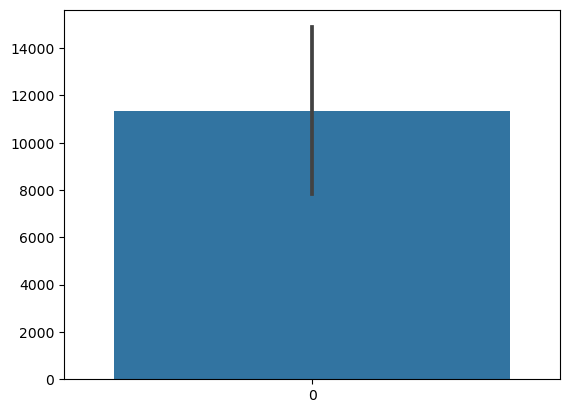

In [106]:
# Get the rows whose category is NaN
catna = df1_cat[df1_cat.category.isna()]
print("# Objects that don't have a category:", catna.shape)
print(catna[["object", "category"]].head())

df1catclean = df1_cat.dropna()
catcount = df1catclean.category.value_counts()

catunique = df1catclean.category.unique()

print("Categories:\n\n", catunique, "\n")
print(catcount)

        index  category
0  Artificial     14880
1     Natural      7824


[Text(0.5, 0, 'categories'), Text(0, 0.5, 'count')]

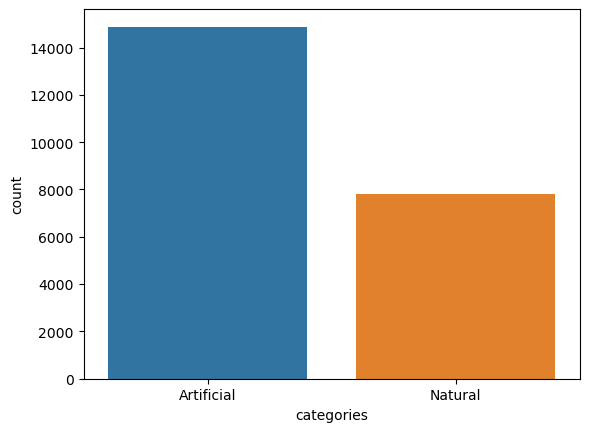

In [109]:
catplot = catcount.reset_index()
print(catplot)
ax = sns.barplot(catplot, x = "index", y = "category")
ax.set(xlabel='categories', ylabel='count')

In [ ]:
# TODO: Average EEG detection for all patients

Analysis
--

Here is a variable you want to assign for the results: `eeg_spike_results`. It is an array of arrays with the count of the EEG spikes.

Right now I only put 7 entries of 3 features, as an example.

[[150 200 100]
 [150 200 100]
 [140 155 155]
 [155 155 140]
 [300   0   0]
 [250   0  50]
 [300   0   0]]
            Sum of power of spike threshold
artificial                       206.428571
natural                          101.428571
food                              77.857143


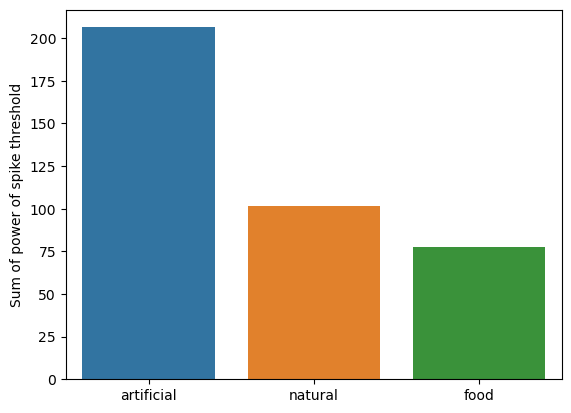

In [ ]:
eeg_categories = ["artificial", "natural", "food"] #np.catunique.to_numpy()
eeg_spike_results = np.array([[150, 200, 100], [150, 200, 100], [140, 155, 155], [155, 155, 140], [300, 0, 0], [250, 0, 50], [300, 0, 0]])
eeg_spike_avg = []

print(eeg_spike_results)

# take the average of each column
for i in range(len(eeg_spike_results[0])):
    eeg_spike_avg.append(np.mean(eeg_spike_results[:, i]))

# TODO: Normalize the averages based on how many times the category appears in the data

eeg_df = pd.DataFrame(data = np.array(eeg_spike_avg).transpose(), index = eeg_categories, columns = ["Sum of power of spike threshold"])
print(eeg_df)

plot_results = sns.barplot(x = eeg_df.index, y = eeg_df["Proportion of category spike threshold reached"])

Analysis:

We will use the 1 way ANOVA test to see if there is a significant difference between subjects so we know that it isn't just preference what makes people happy.

Null Hypothesis: There is a significant difference between the means of the participants' scores that people have their given category invoke happy feelings.

Alternative Hypothesis: There is no significant difference between the means of the participants' scores that people have their given category invoke happy feelings.

In [ ]:
from scipy.stats import f_oneway
print(f_oneway(*eeg_spike_results.transpose().tolist()))

F_onewayResult(statistic=5.244431753283838, pvalue=0.01604635609554898)


Because the p-value is ________ than the alpha value of 0.05, we can...